In [1]:
import tkinter as tk
from tkinter import *
import numpy as np
import pandas as pd
from pandas import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report



# Exploring Data

In [2]:
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\ML\heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

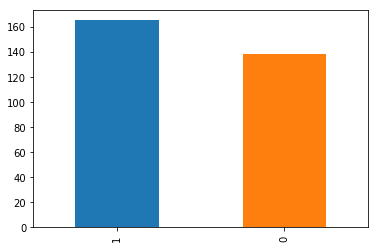

In [5]:
df["target"].value_counts().plot(kind="bar")

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe().head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000


# Finding features

In [8]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


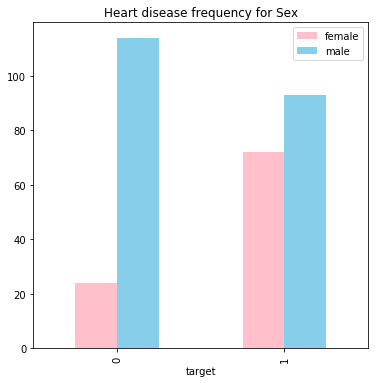

In [9]:
pd.crosstab(df["target"],df["sex"]).plot(kind="bar",color=["pink","skyblue"],figsize=(6,6));
plt.title("Heart disease frequency for Sex")
plt.legend(["female","male"])

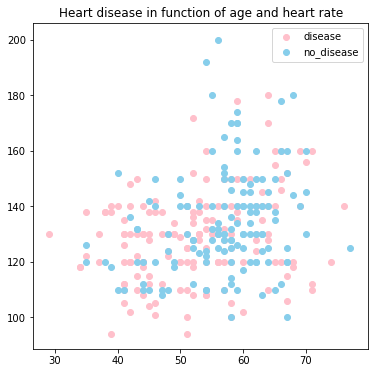

In [10]:
np.random.seed(42)
plt.figure(figsize=(6,6));
plt.scatter(df.age[df.target==1],
           df.trestbps[df.target==1],
           c="pink");
plt.scatter(df.age[df.target==0],
           df.trestbps[df.target==0],
           c="skyblue");
plt.title("Heart disease in function of age and heart rate")
plt.legend(["disease","no_disease"])

In [11]:
pd.crosstab(df["cp"],df["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


Text(0.5, 0, 'chest pain')

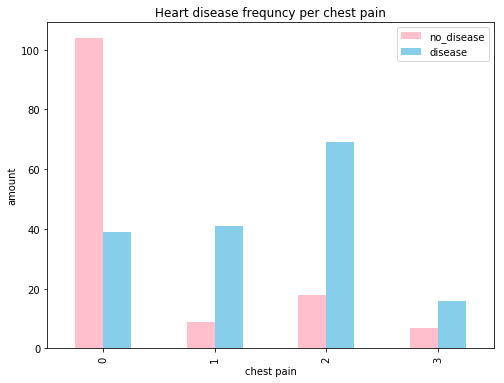

In [12]:
pd.crosstab(df["cp"],df["target"]).plot(kind="bar",color=["pink","skyblue"],figsize=(8,6));
plt.title("Heart disease frequncy per chest pain")
plt.legend(["no_disease","disease"])
plt.ylabel("amount")
plt.xlabel("chest pain")

In [13]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


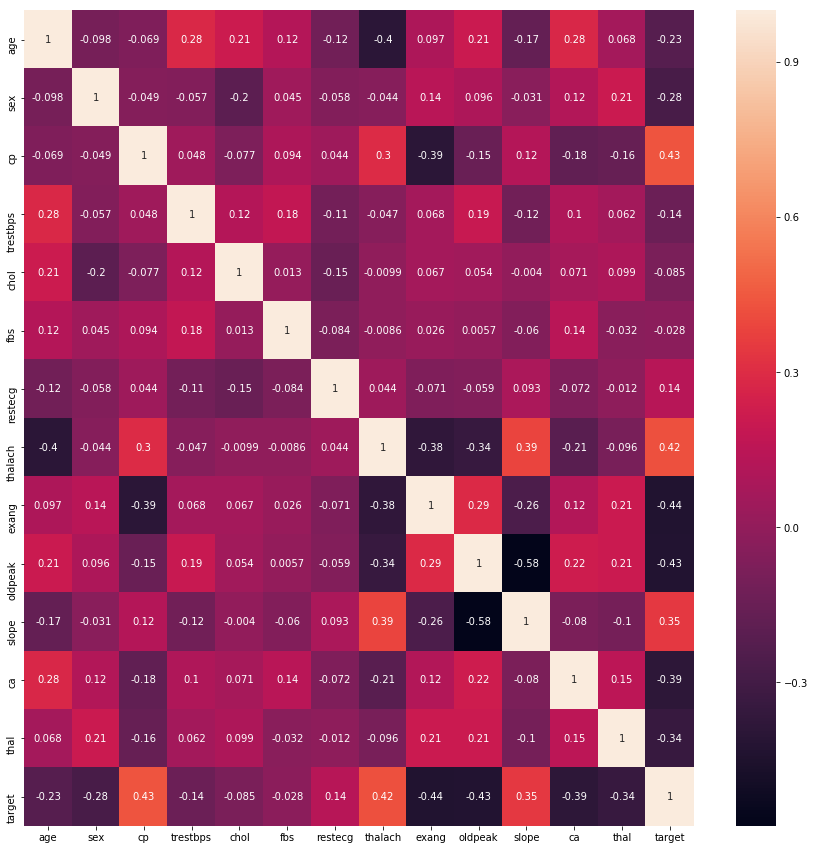

In [14]:
c=df.corr()
fig,ax=plt.subplots(figsize=(15,15))
ax=sns.heatmap(c,annot=True)


# spliting data

In [15]:
x=df.drop("target",axis=1)
y=df["target"]

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Modelling- Random Forest Classifier

In [17]:
np.random.seed(42)
random=RandomForestClassifier(n_estimators = 1000, random_state = 1, max_depth=1)
random.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [18]:
def evaluate(y_true,y_pred):
    print("accuracy is:",accuracy_score(y_true,y_pred)*100,"%")
    print("recall_score is:",recall_score(y_true,y_pred))
    print("precision is:",precision_score(y_true,y_pred))
    print("f1_socre is:",f1_score(y_true,y_pred))

In [19]:
ran_pred=random.predict(x_test)
ran_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [20]:
random_score=evaluate(y_test,ran_pred)
random_score

accuracy is: 88.52459016393442 %
recall_score is: 0.9375
precision is: 0.8571428571428571
f1_socre is: 0.8955223880597014


In [21]:
accuracy=(cross_val_score(random,x,y,cv=5).mean()*100)
accuracy

82.82513661202186

# Tuning Hyperparameters for randomforestclassifier

In [22]:
params={"n_estimators": [10,100,1000,500,200],
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

rv=RandomizedSearchCV(RandomForestClassifier(),params,cv=5,n_iter=20,verbose=2)
rv.fit(x_train,y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=11, max_depth=10 
[CV]  n_estimators=100, min_samples_split=8, min_samples_leaf=11, max_depth=10, total=   0.0s
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=11, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_estimators=100, min_samples_split=8, min_samples_leaf=11, max_depth=10, total=   0.0s
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=11, max_depth=10 
[CV]  n_estimators=100, min_samples_split=8, min_samples_leaf=11, max_depth=10, total=   0.0s
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=11, max_depth=10 
[CV]  n_estimators=100, min_samples_split=8, min_samples_leaf=11, max_depth=10, total=   0.0s
[CV] n_estimators=100, min_samples_split=8, min_samples_leaf=11, max_depth=10 
[CV]  n_estimators=100, min_samples_split=8, min_samples_leaf=11, max_depth=10, total=   0.0s
[CV] n_estimators=500, min_samples_split=18, min_samples_leaf=1, max_depth=5 
[CV]  n_estimators=500, min_samples_split=18, min_samples_leaf=1, max_depth=5, total=   0.3s
[CV] n_estimators=500, min_samples_split=18, min_samples_leaf=1, max_depth=5 
[CV]  n_estimators=500, min_samples_split=18, min_samples_leaf=1, max_depth=5, total=   0.3s
[CV] n_estimators=500, min_samples_split=18, 

[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=5, max_depth=5, total=   0.1s
[CV] n_estimators=1000, min_samples_split=18, min_samples_leaf=13, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=18, min_samples_leaf=13, max_depth=10, total=   0.7s
[CV] n_estimators=1000, min_samples_split=18, min_samples_leaf=13, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=18, min_samples_leaf=13, max_depth=10, total=   0.6s
[CV] n_estimators=1000, min_samples_split=18, min_samples_leaf=13, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=18, min_samples_leaf=13, max_depth=10, total=   0.7s
[CV] n_estimators=1000, min_samples_split=18, min_samples_leaf=13, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=18, min_samples_leaf=13, max_depth=10, total=   0.7s
[CV] n_estimators=1000, min_samples_split=18, min_samples_leaf=13, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=18, min_samples_leaf=13, max_depth=10, total=   0.6s
[CV] n_estimators=200, 

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=17, max_depth=10, total=   0.1s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=17, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=17, max_depth=10, total=   0.0s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   29.5s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'n_estimators': [10, 100, 1000, 500, 200], 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]), 'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]), 'max_depth': [None, 3, 5, 10]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [23]:
rv.best_params_

{'max_depth': 5,
 'min_samples_leaf': 17,
 'min_samples_split': 6,
 'n_estimators': 100}

# Modelling KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors = 23,algorithm= 'ball_tree',  weights= 'uniform')
knn.fit(x_train,y_train)


KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=23, p=2,
           weights='uniform')

In [25]:
knn_pred=knn.predict(x_test)
knn_pred


array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [26]:
knn_score=evaluate(y_test,knn_pred)
knn_score

accuracy is: 72.1311475409836 %
recall_score is: 0.75
precision is: 0.7272727272727273
f1_socre is: 0.7384615384615384


In [27]:
score = round(knn.score(x_train, y_train), 3) *100
score

70.19999999999999

# Tuning for knn


In [28]:
prams={"weights":["uniform", "distance"],
       "algorithm":["auto", "ball_tree", "kd_tree", "brute"],
       "n_neighbors":[5,23,100,45,100]}
rv=RandomizedSearchCV(KNeighborsClassifier(),prams,cv=5,n_iter=20,verbose=2)
rv.fit(x_train,y_train)
       

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_neighbors=45, weights=distance, algorithm=auto ................
[CV] . n_neighbors=45, weights=distance, algorithm=auto, total=   0.0s
[CV] n_neighbors=45, weights=distance, algorithm=auto ................
[CV] . n_neighbors=45, weights=distance, algorithm=auto, total=   0.0s
[CV] n_neighbors=45, weights=distance, algorithm=auto ................
[CV] . n_neighbors=45, weights=distance, algorithm=auto, total=   0.0s
[CV] n_neighbors=45, weights=distance, algorithm=auto ................
[CV] . n_neighbors=45, weights=distance, algorithm=auto, total=   0.0s
[CV] n_neighbors=45, weights=distance, algorithm=auto ................
[CV] . n_neighbors=45, weights=distance, algorithm=auto, total=   0.0s
[CV] n_neighbors=100, weights=uniform, algorithm=brute ...............
[CV]  n_neighbors=100, weights=uniform, algorithm=brute, total=   0.0s
[CV] n_neighbors=100, weights=uniform, algorithm=brute ...............
[CV]  n_neighbo

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  n_neighbors=100, weights=distance, algorithm=auto, total=   0.0s
[CV] n_neighbors=100, weights=distance, algorithm=auto ...............
[CV]  n_neighbors=100, weights=distance, algorithm=auto, total=   0.0s
[CV] n_neighbors=100, weights=distance, algorithm=auto ...............
[CV]  n_neighbors=100, weights=distance, algorithm=auto, total=   0.0s
[CV] n_neighbors=100, weights=distance, algorithm=auto ...............
[CV]  n_neighbors=100, weights=distance, algorithm=auto, total=   0.0s
[CV] n_neighbors=100, weights=distance, algorithm=auto ...............
[CV]  n_neighbors=100, weights=distance, algorithm=auto, total=   0.0s
[CV] n_neighbors=100, weights=distance, algorithm=ball_tree ..........
[CV]  n_neighbors=100, weights=distance, algorithm=ball_tree, total=   0.0s
[CV] n_neighbors=100, weights=distance, algorithm=ball_tree ..........
[CV]  n_neighbors=100, weights=distance, algorithm=ball_tree, total=   0.0s
[CV] n_neighbors=100, weights=distance, algorithm=ball_tree .......

[CV] . n_neighbors=23, weights=uniform, algorithm=brute, total=   0.0s
[CV] n_neighbors=23, weights=uniform, algorithm=brute ................
[CV] . n_neighbors=23, weights=uniform, algorithm=brute, total=   0.0s
[CV] n_neighbors=5, weights=distance, algorithm=brute ................
[CV] . n_neighbors=5, weights=distance, algorithm=brute, total=   0.0s
[CV] n_neighbors=5, weights=distance, algorithm=brute ................
[CV] . n_neighbors=5, weights=distance, algorithm=brute, total=   0.0s
[CV] n_neighbors=5, weights=distance, algorithm=brute ................
[CV] . n_neighbors=5, weights=distance, algorithm=brute, total=   0.0s
[CV] n_neighbors=5, weights=distance, algorithm=brute ................
[CV] . n_neighbors=5, weights=distance, algorithm=brute, total=   0.0s
[CV] n_neighbors=5, weights=distance, algorithm=brute ................
[CV] . n_neighbors=5, weights=distance, algorithm=brute, total=   0.0s
[CV] n_neighbors=100, weights=distance, algorithm=ball_tree ..........
[CV]  

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.0s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'weights': ['uniform', 'distance'], 'n_neighbors': [5, 23, 100, 45, 100]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [29]:
rv.best_params_

{'algorithm': 'kd_tree', 'n_neighbors': 23, 'weights': 'uniform'}

# Logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(C= 206.913808111479, solver= 'liblinear')
log.fit(x_train,y_train)

LogisticRegression(C=206.913808111479, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [31]:
log_pred=log.predict(x_test)
log_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [32]:
log_score=evaluate(y_test,log_pred)
log_score

accuracy is: 85.24590163934425 %
recall_score is: 0.84375
precision is: 0.8709677419354839
f1_socre is: 0.8571428571428571


# Tuning with logistic regression

In [33]:
p={"C": np.logspace(-4, 4, 20),
  "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
  }
rv2=RandomizedSearchCV(LogisticRegression(),p,n_iter=20,cv=5,verbose=2)
rv2.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=1.623776739188721, solver=lbfgs ...............................
[CV] ................ C=1.623776739188721, solver=lbfgs, total=   0.0s
[CV] C=1.623776739188721, solver=lbfgs ...............................
[CV] ................ C=1.623776739188721, solver=lbfgs, total=   0.0s
[CV] C=1.623776739188721, solver=lbfgs ...............................
[CV] ................ C=1.623776739188721, solver=lbfgs, total=   0.0s
[CV] C=1.623776739188721, solver=lbfgs ...............................
[CV] ................ C=1.623776739188721, solver=lbfgs, total=   0.0s
[CV] C=1.623776739188721, solver=lbfgs ...............................
[CV] ................ C=1.623776739188721, solver=lbfgs, total=   0.0s
[CV] C=0.0006951927961775605, solver=lbfgs ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............ C=0.0006951927961775605, solver=lbfgs, total=   0.0s
[CV] C=0.0006951927961775605, solver=lbfgs ...........................
[CV] ............ C=0.0006951927961775605, solver=lbfgs, total=   0.0s
[CV] C=0.0006951927961775605, solver=lbfgs ...........................
[CV] ............ C=0.0006951927961775605, solver=lbfgs, total=   0.0s
[CV] C=0.0006951927961775605, solver=lbfgs ...........................
[CV] ............ C=0.0006951927961775605, solver=lbfgs, total=   0.0s
[CV] C=0.0006951927961775605, solver=lbfgs ...........................
[CV] ............ C=0.0006951927961775605, solver=lbfgs, total=   0.0s
[CV] C=0.08858667904100823, solver=newton-cg .........................
[CV] .......... C=0.08858667904100823, solver=newton-cg, total=   0.0s
[CV] C=0.08858667904100823, solver=newton-cg .........................
[CV] .......... C=0.08858667904100823, solver=newton-cg, total=   0.0s
[CV] C=0.08858667904100823, solver=newton-cg .........................
[CV] .

[CV] ................ C=545.5594781168514, solver=lbfgs, total=   0.0s
[CV] C=545.5594781168514, solver=lbfgs ...............................
[CV] ................ C=545.5594781168514, solver=lbfgs, total=   0.0s
[CV] C=545.5594781168514, solver=lbfgs ...............................
[CV] ................ C=545.5594781168514, solver=lbfgs, total=   0.0s
[CV] C=545.5594781168514, solver=lbfgs ...............................
[CV] ................ C=545.5594781168514, solver=lbfgs, total=   0.0s
[CV] C=545.5594781168514, solver=lbfgs ...............................
[CV] ................ C=545.5594781168514, solver=lbfgs, total=   0.0s
[CV] C=3792.690190732246, solver=newton-cg ...........................
[CV] ............ C=3792.690190732246, solver=newton-cg, total=   0.0s
[CV] C=3792.690190732246, solver=newton-cg ...........................
[CV] ............ C=3792.690190732246, solver=newton-cg, total=   0.0s
[CV] C=3792.690190732246, solver=newton-cg ...........................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.7s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=None,
          param_distributions={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'C': array([1.00000e-04, 2.63665e-04, 6.95193e-04, 1.83298e-03, 4.83293e-03,
       1.27427e-02, 3.35982e-02, 8.85867e-02, 2.33572e-01, 6.15848e-01,
       1.62378e+00, 4.28133e+00, 1.12884e+01, 2.97635e+01, 7.84760e+01,
       2.06914e+02, 5.45559e+02, 1.43845e+03, 3.79269e+03, 1.00000e+04])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [34]:
rv2.best_params_

{'C': 206.913808111479, 'solver': 'liblinear'}

# Model Comparison

In [35]:
model_scores={"randomforest":accuracy_score(y_test,ran_pred),
             "knn":accuracy_score(y_test,knn_pred),
             "logistic_regression":accuracy_score(y_test,log_pred)}
model_scores

{'knn': 0.7213114754098361,
 'logistic_regression': 0.8524590163934426,
 'randomforest': 0.8852459016393442}

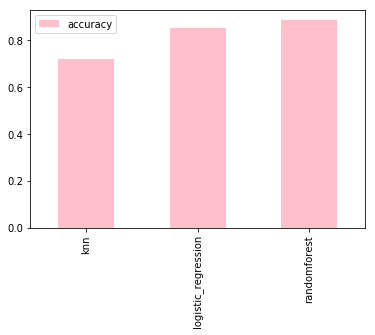

In [36]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar(color="pink")


# Evaluation

In [37]:
pd.crosstab(y_test,
           ran_pred,
           rownames=["actual_labels"],
           colnames=["predicted"])

predicted,0,1
actual_labels,,
0,24,5
1,2,30


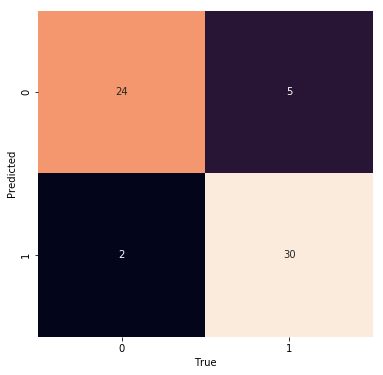

In [38]:
con=confusion_matrix(y_test,ran_pred)
def conf(con):
    fig,ax=plt.subplots(figsize=(6,6))
    ax=sns.heatmap(con,
                  annot=True,
                  cbar=False)
    plt.xlabel("True")
    plt.ylabel("Predicted")
conf(con)    
    

In [39]:
report=classification_report(y_test,ran_pred)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        29
           1       0.86      0.94      0.90        32

   micro avg       0.89      0.89      0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [40]:
evaluate(y_test,ran_pred)

accuracy is: 88.52459016393442 %
recall_score is: 0.9375
precision is: 0.8571428571428571
f1_socre is: 0.8955223880597014


In [41]:
x_test.shape

(61, 13)

# Creating Frontend GUI

In [44]:
root=Tk()

root.minsize(600,600)
bg = PhotoImage(file = r"C:\Users\hp\OneDrive\Desktop\heart2.png")
bg_label=Label(root,image=bg).place(x=0,y=0,relwidth=1,relheight=1)
Label(root,text="Heart Diesease Predcition",bg="skyblue").grid(row=0,column=3)

def get_val():
    input_val=np.array([age_e.get(),sex_e.get(),cp_e.get(),trestbps_e.get(),chol_e.get(),fbs_e.get(),restecg_e.get(),thalach_e.get(),exang_e.get(),oldpeak_e.get(),slope_e.get(),ca_e.get(),
    thal_e.get()])
    b=input_val.reshape(1,-1)
    pred=random.predict([input_val])
    print(input_val)
    print("result:",pred)
    if pred==1:
        label1=tk.Label(text="Heart disease detected !!!",bg="red").grid(row=18,column=3)
        label2=tk.Label(text="-PLEASE VISIT NEAREST CARDIOLOGIST AT THE EARLIEST-").grid(row=20,column=3)
        print("Heart disease detected !!!")
    else:
        label3=tk.Label(text="No Heart disease").grid(row=18,column=3)
        label4=tk.Label(text="Do not forget to exercise daily.").grid(row=19,column=3)
        print("No Heart disease")
    result.configure(text="Result=%d"%pred)
    #tkinter.messagebox.showinfo('result:',pred)



In [45]:
age=tk.Label(root,text="Age:").grid(row=1,column=0)
sex=tk.Label(root,text="Sex:").grid(row=2,column=0)
cp=tk.Label(root,text="CP:").grid(row=3,column=0)
trestbps=tk.Label(root,text="Trestbps:").grid(row=4,column=0)
chol=tk.Label(root,text="Chol:").grid(row=5,column=0)
fbs=tk.Label(root,text="Fbs:").grid(row=6,column=0)
restecg=tk.Label(root,text="Restecg:").grid(row=7,column=0)
thalach=tk.Label(root,text="Thalach:").grid(row=8,column=0)
exang=tk.Label(root,text="Exang:").grid(row=9,column=0)
oldpeak=tk.Label(root,text="Oldpeak:").grid(row=10,column=0)
slope=tk.Label(root,text="Slope:").grid(row=11,column=0)
ca=tk.Label(root,text="CA:").grid(row=12,column=0)
thal=tk.Label(root,text="Thal:").grid(row=13,column=0)
result=tk.Label(root)
result.grid(row=16, column=3) 


age_val=tk.IntVar() 
sex_val=tk.IntVar()
cp_val=tk.IntVar()
trestbps_val=tk.IntVar()
chol_val=tk.IntVar()
fbs_val=tk.IntVar()
restecg_val=tk.IntVar()
thalach_val=tk.IntVar()
exang_val=tk.IntVar()
oldpeak_val=tk.IntVar()
slope_val=tk.IntVar()
ca_val=tk.IntVar()
thal_val=tk.IntVar()




age_e=tk.Entry(root,textvariable=age_val)
age_e.grid(row=1,column=2)
sex_e=tk.Entry(root,textvariable=sex_val)
sex_e.grid(row=2,column=2)
cp_e=tk.Entry(root,textvariable=cp_val)
cp_e.grid(row=3,column=2)
trestbps_e=tk.Entry(root,textvariable=trestbps_val)
trestbps_e.grid(row=4,column=2)
chol_e=tk.Entry(root,textvariable=chol_val)
chol_e.grid(row=5,column=2)
fbs_e=tk.Entry(root,textvariable=fbs_val)
fbs_e.grid(row=6,column=2)
restecg_e=tk.Entry(root,textvariable=restecg_val)
restecg_e.grid(row=7,column=2)
thalach_e=tk.Entry(root,textvariable=thalach_val)
thalach_e.grid(row=8,column=2)
exang_e=tk.Entry(root,textvariable=exang_val)
exang_e.grid(row=9,column=2)
oldpeak_e=tk.Entry(root,textvariable=oldpeak_val)
oldpeak_e.grid(row=10,column=2)
slope_e=tk.Entry(root,textvariable=slope_val)
slope_e.grid(row=11,column=2)
ca_e=tk.Entry(root,textvariable=ca_val)
ca_e.grid(row=12,column=2)
thal_e=tk.Entry(root,textvariable=thal_val)
thal_e.grid(row=13,column=2)

             
Button(root,text="submit",command=get_val,bg="skyblue").grid(row=14,column=3)

root.mainloop()

                                           
                                           
                                           




['63' '1' '3' '145' '233' '1' '0' '150' '0' '2.3' '0' '0' '1']
result: [1]
Heart disease detected !!!
